/Users/braydenkilleen/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


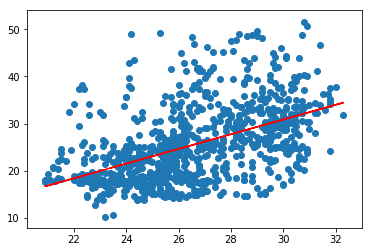

In [23]:
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

def clean_dataset(df, file="outliers.csv"):
    price = list(df['P(t+1)'])
    q1 = np.percentile(price, 25)
    q3 = np.percentile(price, 75)
    
    in_range = [q1 - 1.5 * (q3 - q1), q3 + 1.5 * (q3 - q1)]
    position = np.concatenate((np.where(price > in_range[1]),
        np.where(price < in_range[0])), axis=1)
    
    outliers = df.loc[position[0]]
    outliers.to_csv(file, index=False)
    
    df.drop(df.index[position[0]], inplace=True)
    
    return df

def calculate_CCM(df):
    return np.corrcoef(np.row_stack((
        df['T(t-2)'].values,
        df['T(t-1)'].values,
        df['T(t)'].values,
        df['D(t-2)'].values,
        df['D(t-1)'].values,
        df['D(t)'].values,
        df['P(t+1)'].values
    )))

# Read in the data to a data frame
training_df = pd.read_csv("datasets/Training_Data.csv")
testing_df = pd.read_csv("datasets/Testing_Data.csv")

# Remove the outliers from both training and test datasets
training_df = clean_dataset(training_df, file="datasets/training_outlier.csv")
testing_df = clean_dataset(testing_df, file="datasets/testing_outliers.csv")

training_df.to_csv("datasets/cleaned_training.csv", index=False)
testing_df.to_csv("datasets/cleaned_testing.csv", index=False)

# Calculate the correlation coefficient matrix for each dataset
training_CCM = calculate_CCM(training_df)
testing_CCM = calculate_CCM(testing_df)

#plt.plot(training_df['T(t-2)'].values)
#plt.plot(training_df['D(t)'].values/200)
#plt.plot(training_df['P(t+1)'].values)
#plt.show()

# USE THESE HISTOGRAMS TO CREATE MEMBERSHIP FUNCTIONS
# mean of distribution

# standard deviation of distribution
# fig, ax = plt.subplots()

# histogram of data
# n, bins, patches = ax.hist(training_df['T(t-2)'].values, 50)
# n, bins, patches = ax.hist(training_df['D(t)'].values, 50)
# n, bins, patches = ax.hist(training_df['P(t+1)'].values, 50)
# fig.tight_layout()
# plt.show()

x = training_df['T(t-2)'].values
y = training_df['P(t+1)'].values

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)

fig.show()

In [2]:
# Part III - Design membership functions

# Using {T(t-2), D(t)} -> {P(t+1)}
# Training:
#     Temperature (min=20.9, max=32.3)
#     Demand (min=3807.6, max=6705.4)
#     Price (min=10.25, max=51.63)

# Testing:
#     Temperature (min=22.6, max=33.2)
#     Demand (min=3891.9, 6727.2)
#     Price (min=9.54, 54.33)
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperature = ctrl.Antecedent(np.arange(20, 35, 1), 'Temperature')
demand = ctrl.Antecedent(np.arange(3500, 7000, 1), 'Demand')
price = ctrl.Consequent(np.arange(10, 60), 'Price')

temperature['cold'] = fuzz.trimf(Temperature.universe, [20, 20, 27])
temperature['mild'] = fuzz.trimf(Temperature.universe, [20, 27, 34])
temperature['hot'] = fuzz.trimf(Temperature.universe, [27, 34, 34])

demand['low'] = fuzz.trimf(Demand.universe, [3500, 3500, 5250])
demand['medium'] = fuzz.trimf(Demand.universe, [3500, 5250, 7000])
demand['high'] = fuzz.trimf(Demand.universe, [5250, 7000, 7000])

price['low'] = fuzz.trimf(Price.universe, [10, 10, 35])
price['medium'] = fuzz.trimf(Price.universe, [10, 35, 60])
price['high'] = fuzz.trimf(Price.universe, [35, 60, 60])


"""
rule1 = ctrl.Rule(temperature['cold'] & demand['low'], price['low'])
rule2 = ctrl.Rule(temperature['hot'] & demand['high'], price['high'])

price_ctrl = ctrl.ControlSystem([rule1, rule2])
pricing = ctrl.ControlSystemSimulation(price_ctrl)

temperature_input = np.array(training_df['T(t-2)'].values)
demand_input = np.array(training_df['D(t)'].values)
length = len(temperature_input)
system_outputs = np.zeros(length)

for i in range(length):
    pricing.input['Temperature'] = temperature_input[i]
    pricing.input['Demand'] = demand_input[i]
    pricing.compute()
    system_outputs[i] = pricing.output['Price']
    
print(system_outputs)"""

NameError: name 'Temperature' is not defined